# Pandemic Graph

We will start by understanding and generating a classic pandemic graph

In [41]:
%run -i "scripts/data_preprocessing.py"

Data preprocessed sucessfully


In [1]:
from sklearn.cluster import KMeans
from numpy.random import default_rng
import pandas as pd
import numpy as np

X = pd.read_csv('C:\\Users\\usama\\OneDrive\\Desktop\\github\\covid-19-global-status\\output\\all_data.csv')
ykm = []
res = []
center = []

np.random.seed(220)

for x in range(0,50):
    km = KMeans(
    n_clusters=4, init='random',
    n_init=500, max_iter=100, 
    tol=x*2, random_state=x
    )
    y_km = km.fit_predict(X)
    ykm.append(y_km)
    
    cents = km.cluster_centers_
    center.append(cents)
    zero = (y_km == 0).sum()
    one = (y_km == 1).sum()
    two = (y_km == 2).sum()
    three = (y_km == 3).sum()
    results_tuple = (zero, one, two, three) 
    res.append(results_tuple)
    

In [2]:
sdev=[]

for x in range(0,len(res)):
    std = np.std(res[x])
    sdev.append(std)

In [3]:
res = pd.DataFrame(res)
sdev = pd.DataFrame(sdev)
rykm = pd.concat([res,sdev], axis=1)
rykm.columns = ['0','1','2','3', 'Stdev']

In [4]:
select = rykm[(rykm['Stdev'] < np.percentile(rykm['Stdev'],5))].sort_values(by='Stdev', ascending=True)
sel = select[select['Stdev'] == select['Stdev'].max()]
sel

,0,1,2,3,Stdev
24,3,31,150,1,61.06298


In [5]:
y_km = ykm[sel.index[0]]

In [6]:
zero = (y_km == 0).sum()
one = (y_km == 1).sum()
two = (y_km == 2).sum()
three = (y_km == 3).sum()
print(zero, one, two, three)

3 31 150 1


In [7]:
y_km = pd.DataFrame(y_km)
results = pd.concat([X, y_km], axis=1)
results.columns = ['Strength', 'Impact', 'Prediction']

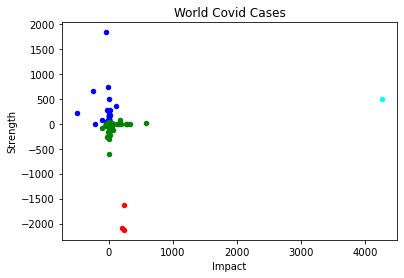

In [8]:
import matplotlib.pyplot as plt
plt.scatter(results[results['Prediction'] == 0]['Impact'] ,results[results['Prediction'] == 0]['Strength'], s=20, c='red', label='C1')
plt.scatter(results[results['Prediction'] == 1]['Impact'] ,results[results['Prediction'] == 1]['Strength'], s=20, c='blue', label='C1')
plt.scatter(results[results['Prediction'] == 2]['Impact'] ,results[results['Prediction'] == 2]['Strength'], s=20, c='green', label='C1')
plt.scatter(results[results['Prediction'] == 3]['Impact'] ,results[results['Prediction'] == 3]['Strength'], s=20, c='cyan', label='C1')

plt.title('World Covid Cases')
plt.xlabel('Impact')
plt.ylabel('Strength')
plt.savefig('graphs/kmeans.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#plt.grid(True, which='both')

#plt.axhline(y=0, color='grey')
#plt.axvline(x=0, color='grey')

plt.scatter(results[results['Prediction'] == 0]['Impact'] ,results[results['Prediction'] == 0]['Strength'], s=20, c='red', label='C1')
plt.scatter(results[results['Prediction'] == 1]['Impact'] ,results[results['Prediction'] == 1]['Strength'], s=20, c='blue', label='C1')
plt.scatter(results[results['Prediction'] == 2]['Impact'] ,results[results['Prediction'] == 2]['Strength'], s=20, c='green', label='C1')
plt.scatter(results[results['Prediction'] == 3]['Impact'] ,results[results['Prediction'] == 3]['Strength'], s=20, c='cyan', label='C1')

plt.title('World Covid Cases')
plt.xlabel('Impact')
plt.ylabel('Strength')

plt.savefig('graphs/kmeans.png')
plt.show()

In [115]:
plt.draw()


<Figure size 432x288 with 0 Axes>

array([[-5.80796703e+02,  5.74670330e+01],
       [ 3.32436794e+00, -5.54868209e+00],
       [ 4.95384615e+02,  4.25784615e+03],
       [ 2.25202279e+02,  7.55612536e+01]])